In [ ]:
#Add folder to sys path to import modules from sub folders
import sys
sys.path.insert(0, r'C:\Users\SaANTIAGO\Google Drive Streaming\My Drive\18_UT_RAPID\cuttings_sensor')

In [1]:
from src.file_dialog import *
import numpy as np
import cv2
from tkinter import Tk, filedialog
from pathlib import Path
import os
from os import listdir
from os.path import isfile, join
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import PIL.Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = Path(r'C:\Program Files\Tesseract-OCR\tesseract.exe') #Set Pytesseract path
#import keras_ocr
import pandas as pd
import datetime

import matplotlib.pyplot as plt

# Image Processing References

https://pythongeeks.org/image-processing-in-python/

https://www.section.io/engineering-education/image-adjustment-to-higher-or-lower-resolution-using-python/

https://www.kaggle.com/competitions/shopee-product-matching/discussion/225463

In [3]:
def get_directory_files(file_extension: str):
    """Look for files in directory with file extension as file_extension.
    Returns directory path as string and list of absolute paths to files with matching extension.
    file_extension: str, file extension
    """
    directory = get_directory('Select Images Directory', as_path=False)
    onlyfiles = [f for f in listdir(directory) if isfile(join(directory, f))]
    files = list([])
    for file in onlyfiles:
         if file.endswith(file_extension):
                file_path = '/'.join([directory, file])
                files.append(file_path)
    return directory, files

In [4]:
def process_img(img_path: str, gray_scale = False):
    """Open image from img_path, invert.
    Returns processed image.
    img_path: absolute path to image file
    gray_scale: Boolean, if True image will be converted to grayscale
    """
    if gray_scale == True:
        img = PIL.Image.open(img_path).convert("L") #Convert to gray-scale
    else:
        img = PIL.Image.open(img_path)
    img = ImageOps.invert(img) #Invert
    return img

In [5]:
def get_number_from_img(img, timeout = 15):
    """Get float number from image.
    Returns float number.
    img: processed image
    timeout: pytesseract timeout value - default = 15
    """
    #Run OCR on image
    img_number = pytesseract.image_to_string(img,
                                             lang='eng',
                                             timeout=timeout,
                                             config='--psm 7 -c tessedit_char_whitelist=0123456789.')
    try:
        img_number = '.' + img_number.split('.')[-1] #Extract right side of number
        img_number = float(img_number) #convert to float
    except:
        img_number = np.nan #if img_number is empty, set as NaN
    return img_number

In [6]:
def get_frame_number(file):
    """Return frame number, based on file absolute path.
    file: file absolute path
    """
    frame_number = file.split('/')[-1].split('_frame_')[-1].split('.')[0]
    frame_number = int(frame_number)
    return frame_number

In [7]:
def get_number_list(files: list):
    """Return number list from image files.
    files: list of image files absolute paths.
    Returns: 
    number_list
    """
    number_list = []
    for file in files:
        img = process_img(file)
        img_number = get_number_from_img(img)
        number_list.append(img_number)
        #print(number_list[-1])
    return number_list

def get_frame_list(files: list):
    """Return frame number list from image files.
    files: list of image files absolute paths.
    Returns: 
    frame_number_list
    """
    frame_number_list = []
    for file in files:
        frame_number = get_frame_number(file)
        frame_number_list.append(frame_number)
    return frame_number_list

In [8]:
def get_time_index(initial_time_str: str, seconds: int, files: list):
    time_array = []
    initial_time_str = initial_time_str
    initial_time = datetime.datetime.strptime(initial_time_str, '%Y-%m-%d %H:%M:%S')
    for i in np.arange(0, len(files), 1):
        time_i = initial_time + i * datetime.timedelta(seconds=seconds)
        time_i = pd.to_datetime(time_i)
        time_array.append(time_i)
    time_array = np.array(time_array)
    return time_array

def get_conveyor_index(initial_conveyor: int, distance: int, files: list):
    conveyor_array = []
    initial_conveyor = initial_conveyor
    for i in np.arange(0, len(files), 1):
        conveyor_i = initial_conveyor + i * distance
        conveyor_array.append(conveyor_i)
    conveyor_array = np.array(conveyor_array)
    return conveyor_array

In [10]:
#Get Directory and Files Paths
directory, files = get_directory_files(file_extension='.tiff')

In [11]:
#Get number and frame number lists
number_list = get_number_list(files)
frame_number_list = get_frame_list(files)

0.00233648
0.00235557
0.00236626
0.00237662
0.00237684
0.00238639
0.080239697
0.00240637
0.00241789
0.00243545
0.00245805
0.00245814
0.00245814
0.00245883
0.00246183
0.00248763
0.80249682
0.00249243
0.8024925
0.800249562
0.00251285
0.00253634
0.00253874
0.80256675
0.0025672
0.0025711
0.800259536
0.00260246
0.00262725
0.80262999
0.00265181
0.0026747
0.600267738
0.60268419
0.00268419
0.80268429
0.00270441
0.600270982
0.00271228
0.00271249
0.600272683
0.80272939
0.00273751
0.00274611
0.00274911
0.800274976
0.00275785
0.80276895
0.00277443
0.00278213
0.00278478
0.00278492
0.00279861
0.00279114
0.6028155
0.00283663
0.00283663
0.00283752
0.00284235
0.80286668
0.00287153
0.00287954
0.800289226
0.00289884
0.60289949
0.00291313
0.002914861
0.00291716
0.00293163
0.80293549
0.00293567
0.602941869
0.00295726
0.80029657
0.60298298
0.602989801
0.60299283
0.00299285
0.00299438
0.800299438
0.60301601
0.80301936
0.00302644
0.60303011
0.60304188
0.60305853
0.80386892
0.860386933
0.60308216
0.00308252
0.

0.80393675
0.60393685
0.80393686
0.80393687


In [60]:
#Get anomalies
num_array = []
for i in np.arange(0, len(number_list)):
    try:
        num = str(np.array(number_list)[np.array(number_list) > 0.009][i]).split('2')[0]
        if (len(num) < 6) & (not(num[-1] == '3')):
            num_array.append(num)
    except:
        next
        
for i in np.arange(0, len(number_list)):
    try:
        num = str(np.array(number_list)[np.array(number_list) > 0.009][i]).split('3')[0]
        if (len(num) < 6) & (not(num[-1] == '2')):
            num_array.append(num)
    except:
        next
#Get unique values
num_array = np.unique(np.array(num_array))

In [61]:
#Set Dataframe
video_data = pd.DataFrame(np.array(number_list), columns=['laser_measurement'])
frame_number_df = pd.DataFrame(np.array(frame_number_list), columns=['frame_number'])

In [62]:
#Get Arrays
time_array = get_time_index(initial_time_str='2022-06-22 16:20:04', seconds=1, files=files)
conveyor_array = get_conveyor_index(initial_conveyor=73600, distance=160, files=files)
#Get DFs
time_array_df = pd.DataFrame(time_array, columns=['time_index'])
conveyor_df = pd.DataFrame(conveyor_array, columns=['conveyor_index'])

In [63]:
#Join Dataframes
video_data = video_data.join(frame_number_df)
video_data = video_data.join(time_array_df)
video_data = video_data.join(conveyor_df)

In [64]:
#Save Dataframe
df_name = 'video_2_2022_06_22_data.csv'
directory = get_directory('Select Directory to backup Video Data DF', as_path=True)
file_path = os.path.join(directory, df_name)
video_data.to_csv(file_path)

In [186]:
#Replace outliers in laser_measurement (due to odd OCR interpretation)
video_data = pd.read_csv(get_data_file('Select Video Data File'), index_col=0)
video_data['time_index'] = pd.to_datetime(video_data['time_index'])

In [187]:
outliers = video_data['laser_measurement'][video_data['laser_measurement'] > 0.009]
#Get anomalies
num_array = []
for i in np.arange(0, len(outliers)):
    try:
        num = str(outliers[i]).split('2')[0]
        if (len(num) < 6) & (not(num[-1] == '3')):
            num_array.append(num)
    except:
        next
        
for i in np.arange(0, len(outliers)):
    try:
        num = str(outliers[i]).split('3')[0]
        if (len(num) < 6) & (not(num[-1] == '2')):
            num_array.append(num)
    except:
        next
#Get unique values
num_array = np.unique(np.array(num_array))
#Sort array based value and larger strings
num_array = np.sort(num_array)[::-1]
# num_array = sorted(list(num_array), key=len, reverse=True)
# num_array = np.array(num_array)

In [188]:
# Find the length of each element
arr_len = np.array([len(i) for i in num_array])
#Generate replacement array
cond = [arr_len > 4, arr_len > 3, arr_len > 2]
choices = ['0.00', '0.00', '0.00']
num_array_replace = np.select(cond, choices)

In [193]:
#Set both arrays as strings
video_data['laser_measurement'] = video_data['laser_measurement'].astype(str)
#num_array = list(num_array.astype(str))
for i in np.arange(0, len(num_array)):
    try:
        #Search on first 5 characters of string
        cond_1 = (video_data['laser_measurement'].astype(str).str.slice(0, 5).str.contains(num_array[i]))
        #Only values higher than num_array element
        cond_2 = (video_data['laser_measurement'].astype(float) >= num_array[i].astype(float))
        mask = cond_2 & cond_1
        #Replace num_Array element in string
        video_data['laser_measurement'][mask] = video_data['laser_measurement'][mask].astype(str).str.replace(num_array[i], num_array_replace[i])
    except:
        next
#Convert to float, and coerce errors (for those elements with errors or NaNs)
video_data['laser_measurement'] = pd.to_numeric(video_data['laser_measurement'], errors = 'coerce')

<ipython-input-193-8569855b18e6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_data['laser_measurement'][mask] = video_data['laser_measurement'][mask].astype(str).str.replace(num_array[i], num_array_replace[i])


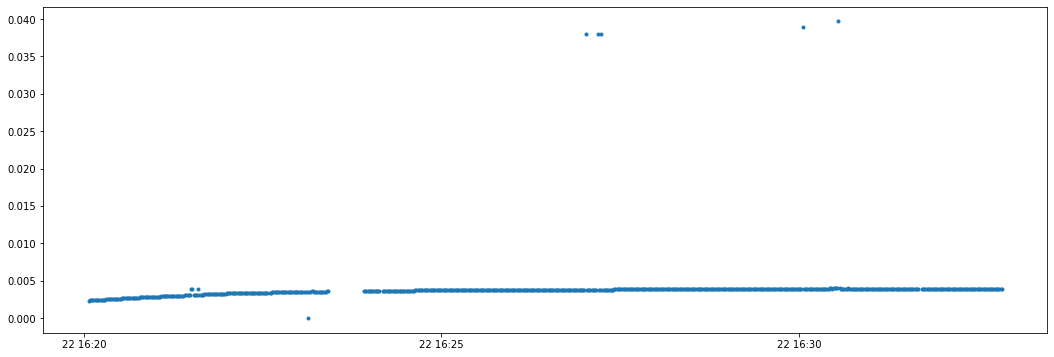

In [194]:
plt.figure(figsize=(18, 6))
plt.plot(video_data['time_index'], video_data['laser_measurement'], '.')

plt.show()

In [181]:
def remove_outliers_iqr(df, col):
    #Replace outliers
    first_q = df[col].quantile(0.25)
    third_q = df[col].quantile(0.75)
    #mean_q = df[col].mean()
    iqr = third_q - first_q
    low_limit = first_q - 1.5*iqr
    high_limit = third_q + 1.5*iqr
    cond_1 = (df[col] > low_limit)
    cond_2 = (df[col] < high_limit)
    mask = cond_1 & cond_2
    df[col] = df[col][mask]
    return df[col]

In [195]:
#Remove laser measurements outliers
video_data['laser_measurement'] = remove_outliers_iqr(video_data, 'laser_measurement')


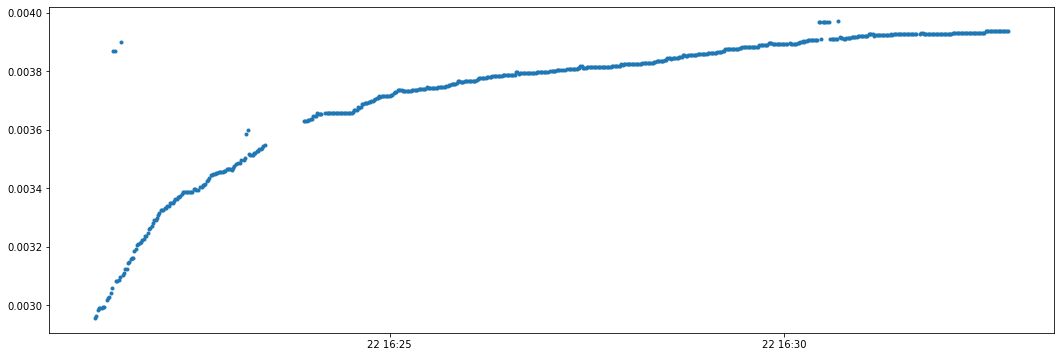

In [196]:
plt.figure(figsize=(18, 6))
plt.plot(video_data['time_index'], video_data['laser_measurement'], '.')
plt.show()

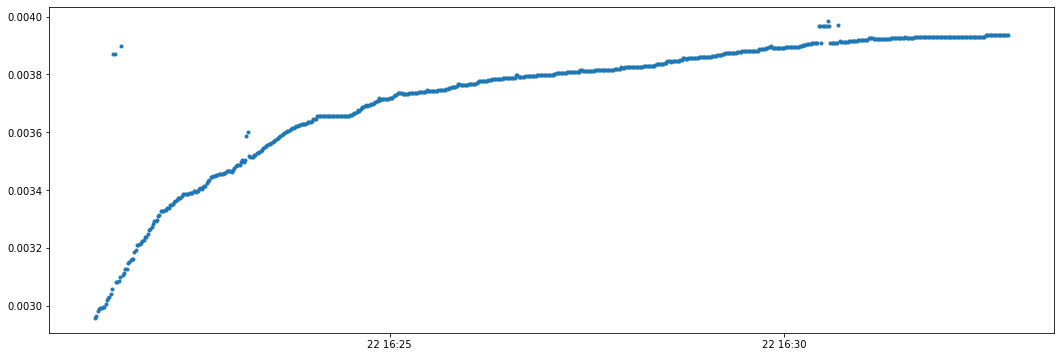

In [199]:
#Interpolate NaNs
laser_measurement_array = video_data['laser_measurement'].interpolate(method='polynomial', order=3)
plt.figure(figsize=(18, 6))
plt.plot(video_data['time_index'], laser_measurement_array, '.')
plt.show()

In [200]:
#Save Dataframe
df_name = 'video_2_2022_06_22_data.csv'
directory = get_directory('Select Directory to backup Video Data DF', as_path=True)
file_path = os.path.join(directory, df_name)
video_data.to_csv(file_path)